In [3]:
#Section7 task 1
# Daily time (in hours): [study, entertainment, sleep]
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]
low = []
moderate = []
high = []

for study, entertainment, sleep in time_data:
    if study < 3:
        low.append(study)
    elif 3 <= study <= 5:
        moderate.append(study)
    else:
        high.append(study)

print("Low:", low)
print("Moderate:", moderate)
print("High:", high)


Low: [2.5, 1.5, 2.0, 2.5]
Moderate: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High: [5.5, 6.0]


In [6]:
#Task2
print("Low days:", len(low))
print("Moderate days:", len(moderate))
print("High days:", len(high))


Low days: 4
Moderate days: 9
High days: 2


In [7]:
#Task3
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]
study_minutes = [study * 60 for study, _, _ in time_data]
print(study_minutes)


[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [8]:
#Task4
study_hours = []
entertainment_hours = []
sleep_hours = []

for study, entertainment, sleep in time_data:
    study_hours.append(study)
    entertainment_hours.append(entertainment)
    sleep_hours.append(sleep)

avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("Average study:", avg_study)
print("Average entertainment:", avg_entertainment)
print("Average sleep:", avg_sleep)


Average study: 3.7
Average entertainment: 2.5
Average sleep: 7.166666666666667


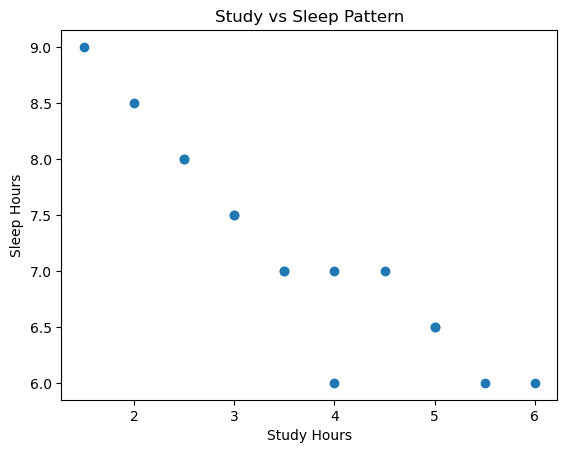

In [9]:
#Task5
import matplotlib.pyplot as plt

plt.scatter(study_hours, sleep_hours)
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.show()


In [10]:
#SECTION 8 — RECURSION
#Task 1
def sum_nested_list(nested_list):
    total = 0
    for element in nested_list:
        if isinstance(element, list):
            total += sum_nested_list(element)
        else:
            total += element
    return total

nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print(sum_nested_list(nested_list))


36


In [11]:
#Task 2
def generate_permutations(s):
    if len(s) == 1:
        return [s]
    
    result = []
    for i in range(len(s)):
        char = s[i]
        remaining = s[:i] + s[i+1:]
        for perm in generate_permutations(remaining):
            result.append(char + perm)
    
    return list(set(result))  # remove duplicates

print(generate_permutations("abc"))


['bac', 'acb', 'bca', 'cab', 'cba', 'abc']


In [12]:
#Task3
def calculate_directory_size(directory):
    total = 0
    for key, value in directory.items():
        if isinstance(value, dict):
            total += calculate_directory_size(value)
        else:
            total += value
    return total

directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {"file5.txt": 250},
        "file6.txt": 150
    }
}

print(calculate_directory_size(directory_structure))


1400


In [13]:
#SECTION 8.2 — DYNAMIC PROGRAMMING
#Task1
def min_coins(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0
    
    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)
    
    return dp[amount] if dp[amount] != float('inf') else -1

print(min_coins([1, 2, 5], 11))


3


In [14]:
#Task2
def longest_common_subsequence(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    
    return dp[n][m]

print(longest_common_subsequence("abcde", "ace"))


3


In [15]:
#Task3
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w - weights[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    
    return dp[n][capacity]

print(knapsack([1, 3, 4, 5], [1, 4, 5, 7], 7))


9
